# K-Nearest Neighbors (KNN) 

Author: **Asad Raza Virk**
- **Twitter**: [Asad Raza Virk](https://twitter.com/virkat)
  

This notebook is a simple explanation of the K-Nearest Neighbors (KNN) algorithm.

**K-Nearest Neighbors (KNN)** is one of the simplest machine learning algorithms. It is used for both **classification** and **regression** tasks. Here’s a very straightforward explanation of how it works:

## What is K-Nearest Neighbors?
KNN works by finding the closest neighbors to a data point and using them to predict what that data point should be. Imagine trying to decide what kind of movie someone likes by asking their friends. If you want to predict something about a new data point, KNN looks at the **K** closest data points (neighbors) and uses their information to make a prediction.

## How Does KNN Work?
1. **Choose K**:
   - The value of **K** is a number you pick. It tells the algorithm how many "neighbors" to consider. For example, if **K = 3**, the algorithm will look at the **3 closest data points**.

2. **Calculate Distance**:
   - To determine which points are closest, KNN uses a **distance metric** like **Euclidean distance** (the straight-line distance between two points).
   - The algorithm calculates the distance from the new point to all other data points, and then selects the **K closest** points.

3. **Make a Prediction**:
   - **Classification**: If most of the **K neighbors** belong to one class (e.g., apples or oranges), the new point is classified accordingly.
   - **Regression**: If it’s a regression problem, KNN takes the average value of the **K neighbors** as the prediction for the new point.

4. For **Regression**:
   - If you are using KNN for regression, the algorithm takes the average of the **K closest neighbors** to predict the value of the new point.

5. For **Classification**:
   - If you are using KNN for classification, the algorithm looks at the **K closest neighbors** and predicts the class based on the majority vote of those neighbors.

6. Formula for **KNN**:
   - For **classification**, the formula is: **Majority Vote** of the **K closest neighbors**.
   - For **regression**, the formula is: **Average** of the **K closest neighbors**.

## Example
Suppose you want to classify a new point as either a **red** or **blue** dot:
- You have a group of red and blue dots on a graph, and you add a new dot.
- You choose **K = 5**, meaning you'll consider the 5 closest dots.
- If **3 out of 5** dots are red, you classify the new dot as **red**.

## Choosing the Value of K
- **Small K**: If **K** is too small (e.g., **K = 1**), the model might be too sensitive to noise and **overfit**.
- **Large K**: If **K** is too large, it might smooth out the differences too much and **underfit** the data.
- The best value for **K** is usually found by trying different values and selecting the one that works best for your dataset (e.g., through cross-validation).

## How Does KNN Decide on Similarity?
- **Euclidean Distance** is the most common metric used to measure how close data points are. It calculates the straight-line distance between two points, similar to measuring the distance between two locations on a map.
- **Manhattan Distance** is another metric that measures the distance between two points by summing the absolute differences between their coordinates.
- **Minkowski Distance** is a generalization of both Euclidean and Manhattan distances.
- **Hamming Distance** is used for categorical data, counting the number of positions at which the corresponding symbols are different.

## Advantages of KNN
1. **Simple and Easy to Understand**: KNN is very intuitive; you look at what the closest data points are doing.
2. **No Training Phase**: KNN doesn’t have a training phase; it simply memorizes the data, making it easy to implement.

## Disadvantages of KNN
1. **Computationally Expensive**: For large datasets, KNN needs to calculate the distance to all other points for each prediction, which can be slow.
2. **Sensitive to Irrelevant Features**: If there are irrelevant features in the data, KNN can become confused, so feature scaling and selection are often needed.

## Visual Example
Imagine you are trying to determine if a fruit is an **apple** or **orange** based on **weight** and **size**:
- You have a scatter plot of apples and oranges.
- You have a new fruit you want to classify.
- If **K = 3** and 2 out of the 3 nearest fruits are apples, you classify the new fruit as an **apple**.

## Summary
- **KNN** is a simple algorithm that finds the **K closest neighbors** to make a prediction.
- It can be used for both **classification** and **regression** tasks.
- The algorithm is based on **distance** (e.g., Euclidean distance) to determine how close data points are to each other.
- Choosing the right value of **K** is important: too small may lead to noisy results, too large may not capture meaningful patterns.

KNN is often used as a **baseline model** due to its simplicity, but for larger datasets or complex tasks, more sophisticated models like **decision trees**, **SVMs**, or **neural networks** are often preferred.



## Viusalization of KNN Classifier
- In this notebook, I will show you how to implement a KNN classifier using the **Iris dataset**.

1. **Import Libraries**

In [1]:
# import the necessary packages
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

2. **Load the Iris Dataset**

In [2]:
# Load the iris dataset
data = sns.load_dataset('iris')

3. **Initiate the Feature and Target Variables**

In [3]:
# initiate the Feature and Target Variables
X = data.iloc[:, :2].values  # Use only the first two features for visualization
y = data['species'].factorize()[0]  # Convert species to numerical values
feature_names = data.columns[:2]  # Get the names of the first two features

4. **Split the Data into Training and Testing Sets**

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. **Scale the Data**

In [5]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5. Set up the **KNN Classifier**

In [6]:
# Set up the KNN classifier
k_values = range(1, 11)
accuracy_values = []

6. **Set up the plot**

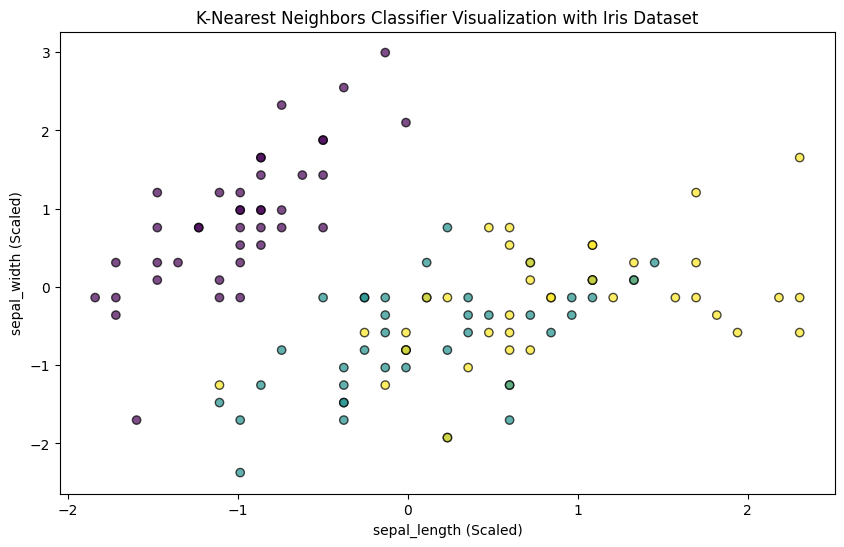

In [7]:
# Setting up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('K-Nearest Neighbors Classifier Visualization with Iris Dataset')
ax.set_xlabel(feature_names[0] + ' (Scaled)')
ax.set_ylabel(feature_names[1] + ' (Scaled)')
sc = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.7, edgecolors='k')
k_text = ax.text(0.95, 0.05, '', transform=ax.transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right')

7. **Define a function to update the plot**

In [8]:
# Function to update the frame
def update(k):
    # Train the KNN classifier with the current value of K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracy_values.append(accuracy)

    # Predict on the training data to visualize the boundaries
    y_pred = knn.predict(X_train)
    ax.clear()
    ax.set_title(f'K-Nearest Neighbors Classifier Visualization with Iris Dataset (K={k})')
    ax.set_xlabel(feature_names[0] + ' (Scaled)')
    ax.set_ylabel(feature_names[1] + ' (Scaled)')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='viridis', alpha=0.7, edgecolors='k')
    k_text.set_text(f'K = {k}\nAccuracy = {accuracy:.2f}')
    ax.text(0.95, 0.01, '@virkat', transform=ax.transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right')
    return sc,


8. **Create the Animation**

In [9]:
# Create the animation
ani = FuncAnimation(fig, update, frames=k_values, repeat=False)

9. **Save the Animation**

In [10]:

# Save the animation as a video
writer = FFMpegWriter(fps=1, metadata=dict(artist='Me'), bitrate=1800)
ani.save("knn_classifier_visualization_iris.mp4", writer=writer)

plt.show()

## Visualization of KNN Regression
- In this notebook, I will show you how to implement a KNN regression using the **tips dataset**.

1. **Import libraries**

In [11]:
# import the KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

2. Import the **tips dataset**

In [12]:
# Load the tips dataset
data = sns.load_dataset('tips')

3. **Initiate the Feature and Target Variables**

In [13]:
# initiate the Feature and Target Variables
X = data[['total_bill', 'size']].values
y = data['tip'].values

4. **Split the Data into Training and Testing Sets**

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. **Scale the Data**

In [15]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


6. **Set up the KNN Regressor**

In [16]:
# Set up the KNN regressor
k_values = range(1, 11)


7. **Set up the plot**

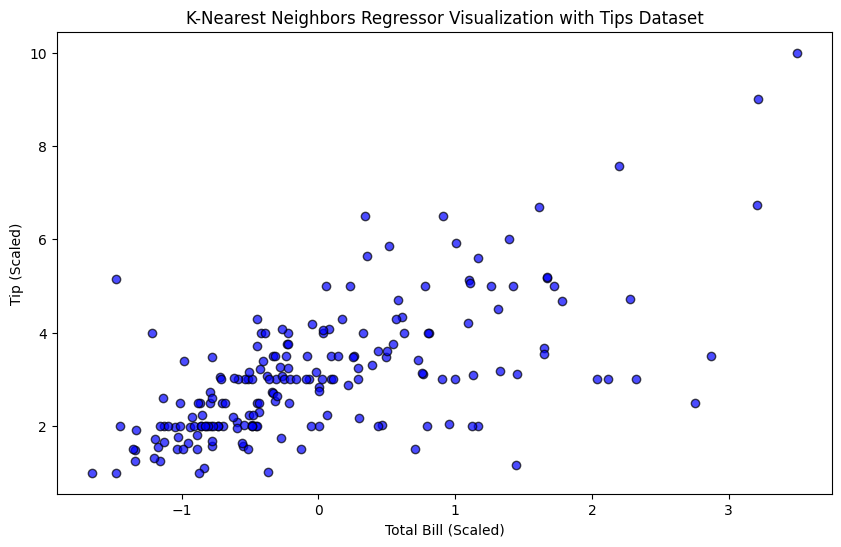

In [17]:
# Setting up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('K-Nearest Neighbors Regressor Visualization with Tips Dataset')
ax.set_xlabel('Total Bill (Scaled)')
ax.set_ylabel('Tip (Scaled)')
sc = ax.scatter(X_train[:, 0], y_train, c='blue', alpha=0.7, edgecolors='k')
k_text = ax.text(0.95, 0.05, '', transform=ax.transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right')


8. **Define a function to update the plot**

In [18]:
# Function to update the frame
def update(k):
    # Train the KNN regressor with the current value of K
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    ax.clear()
    ax.set_title(f'K-Nearest Neighbors Regressor Visualization with Tips Dataset (K={k})')
    ax.set_xlabel('Total Bill (Scaled)')
    ax.set_ylabel('Tip (Scaled)')
    ax.scatter(X_train[:, 0], y_train, c='blue', alpha=0.7, edgecolors='k')
    ax.scatter(X_train[:, 0], y_pred, c='red', alpha=0.7, edgecolors='k')
    k_text.set_text(f'K = {k}')
    ax.text(0.95, 0.01, '@virkat', transform=ax.transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right')
    return sc,



9. **Create the Animation**

In [19]:
# Create the animation
ani = FuncAnimation(fig, update, frames=k_values, repeat=False)


10. **Save the Animation**

In [20]:
# Save the animation as a video
writer = FFMpegWriter(fps=1, metadata=dict(artist='Me'), bitrate=1800)
ani.save("knn_regressor_visualization_tips.mp4", writer=writer)

plt.show()

## Distances of KNN Algorithm
1. **Euclidean Distance**: The straight-line distance between two points.
2. **Manhattan Distance**: The sum of the absolute differences between the two points.
3. **Minkowski Distance**: A generalization of both Euclidean and Manhattan distances.
4. **Hamming Distance**: Used for categorical data, counting the number of positions at which the corresponding symbols are different.

1. **Import Libraries**

In [21]:
# import the libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

2. Load the **Iris Dataset**

In [22]:
# Load the iris dataset
data = sns.load_dataset('iris')

3. **Initiate the Feature and Target Variables**

In [23]:
# initiate the Feature and Target Variables
X = data.iloc[:, :2].values  # Use only the first two features for visualization
y = data['species'].factorize()[0]  # Convert species to numerical values
feature_names = data.columns[:2]  # Get the names of the first two features

4. **Split the Data into Training and Testing Sets**

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. **Scale the Data**

In [25]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5. **Define the distance metrics**

In [26]:
# Define the distance metrics
metrics = ['euclidean', 'manhattan', 'minkowski', 'hamming']
metric_names = ['Euclidean', 'Manhattan', 'Minkowski', 'Hamming']

6. **Select the test point**

In [27]:
# Select a test point
test_point = X_test[0].reshape(1, -1)

7. **Plot the decision boundaries for different distance metrics**

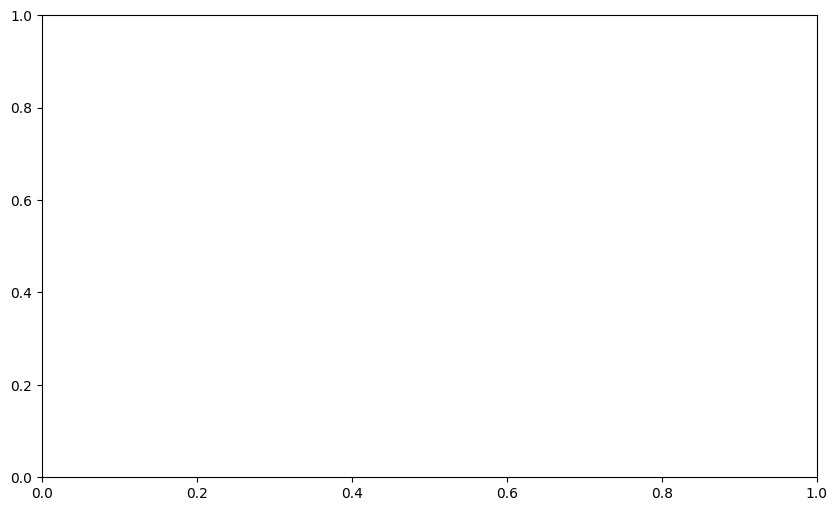

In [28]:
# Plot the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, ax = plt.subplots(figsize=(10, 6))

def update(frame):
    metric = metrics[frame % len(metrics)]
    metric_name = metric_names[frame % len(metrics)]
    
    # Train the KNN classifier with the current metric
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    
    # Calculate distances to the nearest neighbors
    distances, indices = knn.kneighbors(test_point)
    
    ax.clear()
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    ax.scatter(test_point[:, 0], test_point[:, 1], c='yellow', edgecolor='k', s=100, label='Test Point')

    # Plot the distances
    for i in range(5):
        neighbor = X_train[indices[0][i]]
        ax.plot([test_point[0][0], neighbor[0]], [test_point[0][1], neighbor[1]], 'k--', lw=1)
        ax.text((test_point[0][0] + neighbor[0]) / 2, (test_point[0][1] + neighbor[1]) / 2, f'{distances[0][i]:.2f}', color='black')

    ax.set_xlabel(feature_names[0] + ' (Scaled)')
    ax.set_ylabel(feature_names[1] + ' (Scaled)')
    ax.set_title(f'{metric_name} Distance of KNN Algorithm')
    ax.legend()


8. **Create and save the Animation**

In [29]:
# Create the animation
ani = FuncAnimation(fig, update, frames=len(metrics) * 5, repeat=False)

# Save the animation as a video
writer = FFMpegWriter(fps=1, metadata=dict(artist='Me'), bitrate=1800)
ani.save("knn_visualization_distances.mp4", writer=writer)

plt.show()